In [1]:
import pandas as pd
import gffutils
import pybedtools
import re
import numpy as np
%load_ext autoreload
%autoreload 2

v19db_filename = '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'
v19db = gffutils.FeatureDB(v19db_filename)

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/'
csv_folder = '{}/csvs_for_paper'.format(folder)
# folder2 = '/projects/ps-yeolab2/obotvinnik/singlecell_pnms'

In [2]:
import matplotlib.pyplot as plt

In [3]:
from __future__ import print_function

In [10]:
psi = pd.read_csv('{}/outrigger_v2_rmdup_unstranded/psi/outrigger_psi.csv'.format(folder), index_col=0).T
print(psi.shape)
psi.head()

(299, 37194)


event_id,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,isoform1=junction:chr10:101421386-101439481:+|isoform2=junction:chr10:101421386-101439017:+@exon:chr10:101439018-101439223:+@junction:chr10:101439224-101439481:+,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,...,isoform1=junction:chrY:21207178-21237826:-@exon:chrY:21207128-21207177:-@junction:chrY:21206582-21207127:-|isoform2=junction:chrY:21230685-21237826:-@exon:chrY:21230610-21230684:-@junction:chrY:21206582-21230609:-,isoform1=junction:chrY:21749394-21750428:+@exon:chrY:21750429-21750536:+@junction:chrY:21750537-21751406:+|isoform2=junction:chrY:21749394-21750255:+@novel_exon:chrY:21750256-21750297:+@junction:chrY:21750298-21751406:+,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21750255:+@exon:chrY:21750256-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21751406:+@exon:chrY:21751407-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21901549-21903620:-@exon:chrY:21901414-21901548:-@junction:chrY:21897637-21901413:-|isoform2=junction:chrY:21903375-21903620:-@exon:chrY:21903204-21903374:-@junction:chrY:21897637-21903203:-,isoform1=junction:chrY:2709669-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2713686:+,isoform1=junction:chrY:2710284-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2722640:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2722640:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2733128:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2733128:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2734833:+,isoform1=junction:chrY:2713785-2733128:+@exon:chrY:2733129-2733286:+@junction:chrY:2733287-2734833:+|isoform2=junction:chrY:2713785-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+
CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN

## Look at distributions

In [11]:
bins = np.linspace(0, 1, 50)
bins

array([ 0.        ,  0.02040816,  0.04081633,  0.06122449,  0.08163265,
        0.10204082,  0.12244898,  0.14285714,  0.16326531,  0.18367347,
        0.20408163,  0.2244898 ,  0.24489796,  0.26530612,  0.28571429,
        0.30612245,  0.32653061,  0.34693878,  0.36734694,  0.3877551 ,
        0.40816327,  0.42857143,  0.44897959,  0.46938776,  0.48979592,
        0.51020408,  0.53061224,  0.55102041,  0.57142857,  0.59183673,
        0.6122449 ,  0.63265306,  0.65306122,  0.67346939,  0.69387755,
        0.71428571,  0.73469388,  0.75510204,  0.7755102 ,  0.79591837,
        0.81632653,  0.83673469,  0.85714286,  0.87755102,  0.89795918,
        0.91836735,  0.93877551,  0.95918367,  0.97959184,  1.        ])

/home/obotvinnik/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/obotvinnik/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


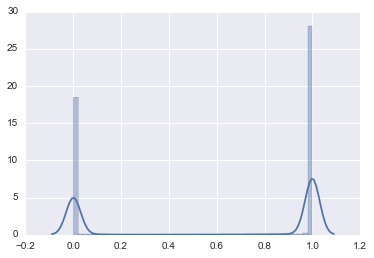

In [12]:
import seaborn as sns
%matplotlib inline

bins = np.linspace(0, 1, 50)

sns.distplot(psi.values.flat, bins=bins, hist_kws=dict(range=(0, 1)))

## Remove events that are 0 or 1 in all samples

In [13]:
notnull = psi.notnull()

constitutively0 = (psi == 0)[notnull].all()

constitutively1 = (psi == 1)[notnull].all()
alternative = psi.columns[~constitutively0 & ~constitutively1]
print('len(alternative)', len(alternative))


constitutively0 = constitutively0[constitutively0].index
constitutively1 = constitutively1[constitutively1].index

print('len(constitutively0)', len(constitutively0))
print('len(constitutively1)', len(constitutively1))

constitutive = constitutively0 | constitutively1
print('len(constitutive)', len(constitutive))

len(alternative) 26987
len(constitutively0) 6458
len(constitutively1) 6872
len(constitutive) 10207


In [14]:
csv_folder

'/projects/ps-yeolab/obotvinnik/singlecell_pnms//csvs_for_paper'

In [15]:
psi_constitutive1 = psi[constitutively1]
psi_constitutive1.to_csv('{}/psi_constitutively1.csv'.format(csv_folder))
psi_constitutive1.head()

event_id,isoform1=junction:chr10:101421386-101439481:+|isoform2=junction:chr10:101421386-101439017:+@exon:chr10:101439018-101439223:+@junction:chr10:101439224-101439481:+,isoform1=junction:chr10:102013297-102020722:-|isoform2=junction:chr10:102020077-102020722:-@exon:chr10:102019975-102020076:-@junction:chr10:102013297-102019974:-,isoform1=junction:chr10:102703886-102706795:+|isoform2=junction:chr10:102703886-102705086:+@exon:chr10:102705087-102705263:+@junction:chr10:102705264-102706795:+,isoform1=junction:chr10:103904848-103908128:+|isoform2=junction:chr10:103904848-103906428:+@exon:chr10:103906429-103907149:+@junction:chr10:103907150-103908128:+,isoform1=junction:chr10:103912288-103917805:+|isoform2=junction:chr10:103912288-103916775:+@exon:chr10:103916776-103916831:+@junction:chr10:103916832-103917805:+,isoform1=junction:chr10:103912288-103919189:+|isoform2=junction:chr10:103912288-103918949:+@exon:chr10:103918950-103919065:+@junction:chr10:103919066-103919189:+,isoform1=junction:chr10:103912288-103919189:+|isoform2=junction:chr10:103912288-103918949:+@exon:chr10:103918950-103919095:+@junction:chr10:103919096-103919189:+,isoform1=junction:chr10:104111709-104113356:+|isoform2=junction:chr10:104111709-104112214:+@exon:chr10:104112215-104112275:+@junction:chr10:104112276-104113356:+,isoform1=junction:chr10:104240930-104241757:-|isoform2=junction:chr10:104241656-104241757:-@exon:chr10:104241594-104241655:-@junction:chr10:104240930-104241593:-,isoform1=junction:chr10:104240930-104241757:-|isoform2=junction:chr10:104241677-104241757:-@novel_exon:chr10:104241594-104241676:-@junction:chr10:104240930-104241593:-,...,isoform1=junction:chrY:14813985-14820881:+@novel_exon:chrY:14820882-14820960:+@junction:chrY:14820961-14821320:+|isoform2=junction:chrY:14813985-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+,isoform1=junction:chrY:15024975-15026475:+@exon:chrY:15026476-15026561:+@junction:chrY:15026562-15026978:+|isoform2=junction:chrY:15024975-15025629:+@exon:chrY:15025630-15025765:+@junction:chrY:15025766-15026978:+,isoform1=junction:chrY:21094728-21206547:-@novel_exon:chrY:21094629-21094727:-@junction:chrY:21039092-21094628:-|isoform2=junction:chrY:21205233-21206547:-@exon:chrY:21205049-21205232:-@junction:chrY:21039092-21205048:-,isoform1=junction:chrY:21749394-21750428:+@exon:chrY:21750429-21750536:+@junction:chrY:21750537-21751406:+|isoform2=junction:chrY:21749394-21750255:+@novel_exon:chrY:21750256-21750297:+@junction:chrY:21750298-21751406:+,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21750255:+@exon:chrY:21750256-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:2709669-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2713686:+,isoform1=junction:chrY:2710284-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2722640:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2722640:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2733128:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2733128:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2734833:+,isoform1=junction:chrY:2713785-2733128:+@exon:chrY:2733129-2733286:+@junction:chrY:2733287-2734833:+|isoform2=junction:chrY:2713785-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+
CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,N

In [16]:
psi_constitutive1.shape

(299, 6872)

In [17]:
psi_constitutive0 = psi[constitutively0]
psi_constitutive0.to_csv('{}/psi_constitutively0.csv'.format(csv_folder))
psi_constitutive0.head()

event_id,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,isoform1=junction:chr10:102743575-102747069:-|isoform2=junction:chr10:102746733-102747069:-@exon:chr10:102746444-102746732:-@junction:chr10:102743575-102746443:-,isoform1=junction:chr10:103361094-103369123:+|isoform2=junction:chr10:103361094-103368623:+@exon:chr10:103368624-103368801:+@junction:chr10:103368802-103369123:+,isoform1=junction:chr10:103364970-103369123:+|isoform2=junction:chr10:103364970-103368623:+@exon:chr10:103368624-103368801:+@junction:chr10:103368802-103369123:+,isoform1=junction:chr10:103901762-103906428:+|isoform2=junction:chr10:103901762-103904006:+@exon:chr10:103904007-103904064:+@junction:chr10:103904065-103906428:+,isoform1=junction:chr10:103904065-103908128:+|isoform2=junction:chr10:103904065-103904776:+@exon:chr10:103904777-103904847:+@junction:chr10:103904848-103908128:+,isoform1=junction:chr10:103904065-103908128:+|isoform2=junction:chr10:103904065-103906428:+@exon:chr10:103906429-103907149:+@junction:chr10:103907150-103908128:+,isoform1=junction:chr10:104629351-104632204:+|isoform2=junction:chr10:104629351-104629561:+@exon:chr10:104629562-104629602:+@junction:chr10:104629603-104632204:+,isoform1=junction:chr10:106037875-106058885:+|isoform2=junction:chr10:106037875-106057335:+@exon:chr10:106057336-106057442:+@junction:chr10:106057443-106058885:+,isoform1=junction:chr10:106037875-106058885:+|isoform2=junction:chr10:106037875-106057335:+@novel_exon:chr10:106057336-106057427:+@junction:chr10:106057428-106058885:+,...,isoform1=junction:chrY:14774638-14798441:+@exon:chrY:14798442-14798535:+@junction:chrY:14798536-14832521:+|isoform2=junction:chrY:14774638-14776570:+@exon:chrY:14776571-14776617:+@junction:chrY:14776618-14832521:+,isoform1=junction:chrY:14776618-14821320:+@exon:chrY:14821321-14821476:+@junction:chrY:14821477-14832521:+|isoform2=junction:chrY:14776618-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14832521:+,isoform1=junction:chrY:21039092-21094628:-@exon:chrY:21038954-21039091:-@junction:chrY:21034721-21038953:-|isoform2=junction:chrY:21089060-21094628:-@novel_exon:chrY:21088962-21089059:-@junction:chrY:21034721-21088961:-,isoform1=junction:chrY:21094728-21206547:-@novel_exon:chrY:21094629-21094727:-@junction:chrY:21039092-21094628:-|isoform2=junction:chrY:21205233-21206547:-@exon:chrY:21205049-21205232:-@junction:chrY:21039092-21205048:-,isoform1=junction:chrY:21749394-21750428:+@exon:chrY:21750429-21750536:+@junction:chrY:21750537-21751406:+|isoform2=junction:chrY:21749394-21750255:+@novel_exon:chrY:21750256-21750297:+@junction:chrY:21750298-21751406:+,isoform1=junction:chrY:2709669-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2713686:+,isoform1=junction:chrY:2710284-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2722640:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2722640:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2733128:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2733128:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2734833:+,isoform1=junction:chrY:2713785-2733128:+@exon:chrY:2733129-2733286:+@junction:chrY:2733287-2734833:+|isoform2=junction:chrY:2713785-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+
CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N

In [21]:
psi_alternative = psi[alternative]
psi_alternative.to_csv('{}/psi.csv'.format(csv_folder))
psi_alternative.to_csv('{}/splicing.csv'.format(csv_folder))
psi_alternative.head()

event_id,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@exon:chr10:101514286-101514391:+@junction:chr10:101514392-101515381:+,isoform1=junction:chr10:101507148-101515381:+|isoform2=junction:chr10:101507148-101514285:+@novel_exon:chr10:101514286-101514333:+@junction:chr10:101514334-101515381:+,...,isoform1=junction:chrY:14798536-14821320:+@exon:chrY:14821321-14821476:+@junction:chrY:14821477-14832521:+|isoform2=junction:chrY:14798536-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14832521:+,isoform1=junction:chrY:14802371-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14820885:+|isoform2=junction:chrY:14802371-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14820885:+,isoform1=junction:chrY:14802371-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+|isoform2=junction:chrY:14802371-14813938:+@novel_exon:chrY:14813939-14813984:+@junction:chrY:14813985-14821320:+,isoform1=junction:chrY:14813985-14820885:+@novel_exon:chrY:14820886-14820960:+@junction:chrY:14820961-14821320:+|isoform2=junction:chrY:14813985-14820566:+@exon:chrY:14820567-14820626:+@junction:chrY:14820627-14821320:+,isoform1=junction:chrY:14891581-14902339:+@exon:chrY:14902340-14902465:+@junction:chrY:14902466-14903431:+|isoform2=junction:chrY:14891581-14898454:+@exon:chrY:14898455-14898733:+@junction:chrY:14898734-14903431:+,isoform1=junction:chrY:15470434-15471646:-@exon:chrY:15470344-15470433:-@junction:chrY:15469850-15470343:-|isoform2=junction:chrY:15471103-15471646:-@exon:chrY:15470968-15471102:-@junction:chrY:15469850-15470967:-,isoform1=junction:chrY:16634822-16831338:+@exon:chrY:16831339-16831398:+@junction:chrY:16831399-16834996:+|isoform2=junction:chrY:16634822-16733888:+@exon:chrY:16733889-16734471:+@junction:chrY:16734472-16834996:+,isoform1=junction:chrY:21207178-21237826:-@exon:chrY:21207128-21207177:-@junction:chrY:21206582-21207127:-|isoform2=junction:chrY:21230685-21237826:-@exon:chrY:21230610-21230684:-@junction:chrY:21206582-21230609:-,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21751406:+@exon:chrY:21751407-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21901549-21903620:-@exon:chrY:21901414-21901548:-@junction:chrY:21897637-21901413:-|isoform2=junction:chrY:21903375-21903620:-@exon:chrY:21903204-21903374:-@junction:chrY:21897637-21903203:-
CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep

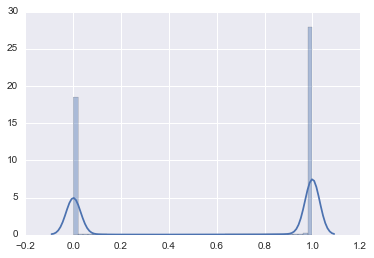

In [22]:
import seaborn as sns
%matplotlib inline

bins = np.linspace(0, 1, 50)

sns.distplot(psi_alternative.values.flat, bins=bins, hist_kws=dict(range=(0, 1)))